●概念/特徴

- https://www.youtube.com/watch?v=v5Ed_DJenNQ 　　 by ウマたん　@youtube 
- https://www.youtube.com/watch?v=Fx-oG_z9HSk　　　by いまにゅのプログラミング塾　@youtube 
- https://www.youtube.com/watch?v=cNEhKEb9-JU 　 　by Able Programming　@youtube(20分頃まで)

## 1.このSprintについて

### Sprintの目的
- スクラッチを通してSVMを理解する
- 線形モデルと異なる手法に触れる

### どのように学ぶか
スクラッチでSVMを実装した後、学習と検証を行なっていきます。



## 2.SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。


**雛形**



In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [988]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    
    
    def __init__(self, num_iter=100, lr = 0.01, kernel='linear', threshold=1e-5
                           , verbose=False, gamma =1, theta =0, degree =1):

        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta = theta
        self.degree = degree
        
    def _kernel(self, X):
        if self.kernel == 'poly':
            self.gamma = 1
            self.theta = 1
            self.degree =2
        return (self.gamma*X@X.T+self.theta)**self.degree
        
    def _upde_lamda(self, X, y):
        for i in range(self.iter):
            self.lamda += self.lr*(1-np.sum(self.lamda*y*y.T*self._kernel(X), axis =0).reshape(-1, 1))
            self.lamda = np.where(self.lamda>=0, self.lamda, 0)
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #lamdaをXのサンプル数分生成
        self.lamda = np.random.rand(len(X)).reshape(-1, 1)
        
        #yのラベルを-1と1に変換する
        self.ylabel = np.unique(y)
        y = np.where(y==self.ylabel[0], -1, 1).reshape(-1, 1)
        
        #lamdaを更新する
        self._upde_lamda(X, y)
        
        #verboseをTrueにした際は学習過程を出力
        if self.verbose:
            print()
        
        #サポートベクトルの抽出、諸元
        self.n_support_vectors = np.where(self.lamda>self.threshold)[0].size
        self.index_support_vectors = np.where(self.lamda>self.threshold)[0]   
        self.X_sv = X[np.where(self.lamda>self.threshold)[0]]    
        self.lam_sv = self.lamda[np.where(self.lamda>self.threshold)[0]]
        self.y_sv = y[np.where(self.lamda>self.threshold)[0]]    
    
    def predict(self, X_val):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        lamsv_ysv = self.lam_sv*self.y_sv
        kern = (self.gamma*X_val@self.X_sv.T+ self.theta)**self.degree
        y_pred = lamsv_ysv.T@kern.T
        return np.where(y_pred >=0, self.ylabel[1], self.ylabel[0])


### 余裕あったら前期の先輩のコードを下に貼り付けて理解する

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 λ を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
λ^{new}_i=λ_i+α(1−\sum_{j=1}^{n}λ_jy_iy_jk(x_i,x_j))
$$


ここで $k(x_i,x_j)$ はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

$$
k(x_i,x_j)=x^T_ix_j
$$

条件として、更新毎に $λ_i>=0$を満たす必要があります。満たさない場合は $λ_i=0$とします。


$i,j$ : サンプルのインデックス


$λ^{new}_i$ : 更新後のi番目のサンプルのラグランジュ乗数


$λ_i$ : 更新前のi番目のサンプルのラグランジュ乗数


α : 学習率


$λ_j$ : j番目のサンプルのラグランジュ乗数


$y_i$ : i番目のサンプルのラベル


$y_j$ : j番目のサンプルのラベル


x
i
 : i番目のサンプルの特徴量ベクトル


$x_j$ : j番目のサンプルの特徴量ベクトル


あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。

In [1132]:
#問題１のカーネル関数を独立したメソッドにする
def kerx(X):
    return np.dot(X, X.T)

In [1841]:
from sklearn.datasets import load_iris
iris = load_iris()

In [1128]:
print(type(X))
print(y.shape)
print(Xy.shape)

<class 'numpy.ndarray'>
(100,)
(100, 3)


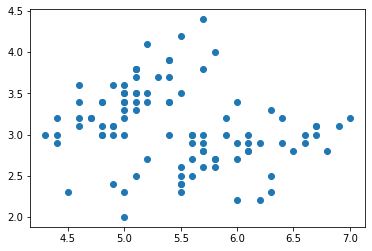

In [1129]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [1842]:
X = iris.data[:100, :2]
y = iris.target[:100]
Xy = np.concatenate([X, y.reshape(-1, 1)], axis =1)

In [1843]:
ylabel = np.unique(y)

In [1844]:
y = np.where(y==ylabel[0], 1, -1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [1845]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.7,random_state=71)

In [1835]:
lamda = np.random.rand(len(X_train)).reshape(-1, 1)

In [1836]:
def _kernel(x1, x2):
        """
        カーネル関数を計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
#         if kernel == 'polly':
#             ganma = 1
#             theta = 1
#             d = 2
        return np.dot(x1,x2.T)
#        return (ganma*np.dot(X,X.T)+theta)**d

In [1002]:
# lr = 0.01
# for i in range(len(X_train)):
#     total = 0
#     for j in range(len(X_train)):
#         print(X_train[i], X_train[j])
#         total += lamda[j]*y_train[i]*y_train[j]*_kernel(X[i], X[j])
    
#     lamda[i] += lr*(1-total)
#     if lamda[i] < 0:
#         lamda[i] = 0


In [1838]:
threshold=1e-5
index_support_vectors = np.where(lamda > threshold)
X_sv = X_train[index_support_vectors]
n_support_vectors = len(X_sv)
lam_sv = lamda[index_support_vectors]
y_sv = y_train.reshape(-1, 1)[index_support_vectors]

In [1003]:
# num_iter = 10000
# alpha = 0.00003
# lamda = np.random.rand(len(X_train)).reshape(-1, 1)
# for i in range(num_iter):
#             lamda = lamda + alpha*(1-np.sum(lamda.T@(y_train.reshape(-1, 1)*y_train.reshape(-1, 1).T)@kerx(X_train)))
#             lamda = np.where(lamda<0, 0, lamda)
# print(lamda)

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 λ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [695]:
threshold = 0.00001 #1e-5
spt_vec = np.where(lamda_new>threshold)
spt_vec[0]

array([ 8, 16, 17, 21, 22, 26, 29, 30, 36, 43, 49, 51, 58, 61, 68])

In [696]:
X_train[spt_vec[0], :]

array([[5.5, 3.5],
       [5.4, 3.4],
       [5.5, 2.5],
       [6. , 2.2],
       [4.6, 3.4],
       [6.7, 3. ],
       [5.2, 4.1],
       [4.8, 3.4],
       [5.7, 2.8],
       [5. , 3.3],
       [6.4, 2.9],
       [6.1, 3. ],
       [5.3, 3.7],
       [4.4, 2.9],
       [5.5, 2.4]])

## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた $f(x)$ の符号が分類結果です。

$$
f(x)=\sum_{n=1}^{N}λ_ny_{sv_n}k(x,s_n)
$$

$x$ : 推定したいデータの特徴量ベクトル


$N$ : サポートベクターの数


$n$ : サポートベクターのインデックス


$λ_n : n$番目のサポートベクターのラグランジュ乗数


$y_{svn} : n$番目のサポートベクターのラベル


$k()$ : カーネル関数


$s_n : n$番目のサポートベクターの特徴量

In [731]:
#print('lamda.shape:',lamda_new[spt_vec[0]].shape)
# print(lamda_new[spt_vec[0]])
#print('ytrain.shape:',y_train[spt_vec[0]].shape)
# print(y_train[spt_vec[0]])
# print('valed.shape:',X_valid.shape)
# print(X_valid)
# print('Xtrain.shape:',X_train[spt_vec[0]].shape)
# print(X_train[spt_vec[0]])

lamlam = lamda_new[spt_vec[0]]*y_train.reshape(-1, 1)[spt_vec[0]]
kerx=  np.dot(X_train[spt_vec[0]], X_valid.T)

np.dot(lamlam.T, kerx)
np.where(suitei>0, 1, -1)

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1]])

# 3.検証

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



In [989]:
#Sprint1 のサンプルデータ
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

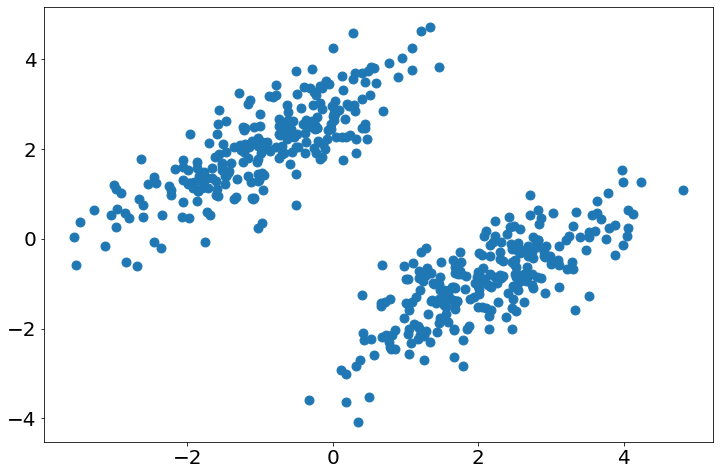

In [990]:
# シンプルデータ1を可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [991]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,random_state=0)

In [992]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)

In [993]:
svm = ScratchSVMClassifier(num_iter =1000, lr = 0.0001)

In [994]:
svm.fit(X_train_std, y_train)
Y_pred = svm.predict(X_valid_std)
Y_pred = Y_pred.T

In [995]:
print('スクラッチによる推定結果')
print('accuracy = {}'.format(accuracy_score(y_valid, Y_pred)))
print('precision = {}'.format(precision_score(y_valid, Y_pred)))
print('recall = {}'.format(recall_score(y_valid, Y_pred)))
print('f1 score = {}'.format(f1_score(y_valid, Y_pred)))

スクラッチによる推定結果
accuracy = 1.0
precision = 1.0
recall = 1.0
f1 score = 1.0


### sklearnを利用しての学習

In [975]:
from sklearn.svm import SVC
svm1 =SVC()
svm1.fit(X_train_std, y_train)
Y_pred1 = svm1.predict(X_valid_std)

In [976]:
print('sklearnによる推定結果')
print('accuracy = {}'.format(accuracy_score(y_valid, Y_pred1)))
print('precision = {}'.format(precision_score(y_valid, Y_pred1)))
print('recall = {}'.format(recall_score(y_valid, Y_pred1)))
print('f1 score = {}'.format(f1_score(y_valid, Y_pred1)))

sklearnによる推定結果
accuracy = 1.0
precision = 1.0
recall = 1.0
f1 score = 1.0


### グリッドサーチを一応やってみる

In [977]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y,train_size =0.75, random_state = 0)

# #from sklearn.preprocessing import StandardScaler
# #sc = StandardScaler()
# #X_train_std = sc.fit_transform(X_train)
# #X_test_std = sc.transform(X_test)

# param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'kernel':['linear', 'poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}

# #グリッドサーチ実行
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train)
# print(grid.best_estimator_) # ベストのパラメーターを持つ分類器

## 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

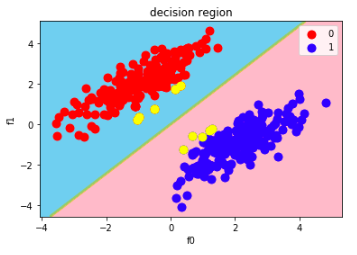

In [996]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['1', '-1']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.X_sv[:,0], model.X_sv[:, 1], s=80, color='yellow', label='SV', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Number of Support_vactor: 25


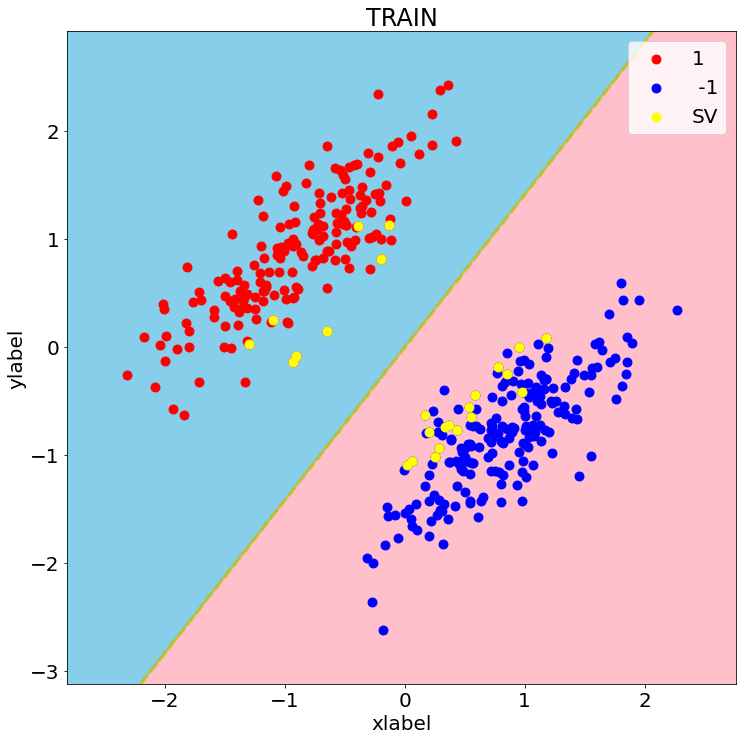

In [997]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',svm.n_support_vectors)
decision_region(X_train_std,y_train,svm,title='TRAIN',target_names=['1', ' -1']);
#plt.scatter(X_valid_std[:,0],X_valid_std[:,1],s=80,label='valid');

### sklearnを利用しての可視化

Number of Support_vactor: [6 8]


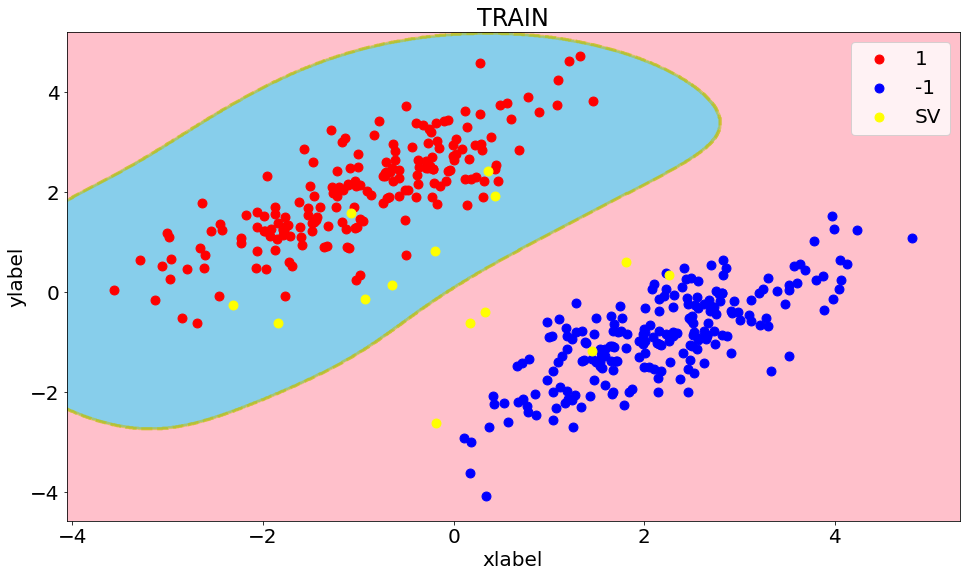

In [902]:
fit,ax = plt.subplots(figsize=(16,9))
print('Number of Support_vactor:',svm1.n_support_)
decision_region1(X_train,y_train,svm1,title='TRAIN');

# 4.SVMとはどのような仕組みか

スクラッチ実装に必要な情報は以上ですが、大まかな仕組みの解説を行います。


SVMは決定境界と近くの点の距離（マージン）を最大化する方法です。特徴量が2つであれば以下の図のように線を引くことを考えます。

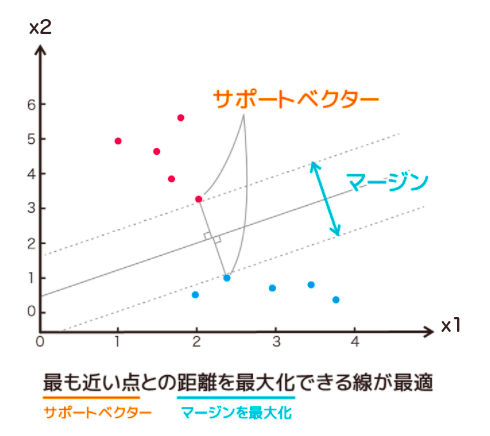

決定境界は線形であれば、線形回帰やロジスティック回帰と同様に次の式です。

$$
y(x) = w^{T}x
$$

x: 特徴量ベクトル


w: 重みベクトル


決定境界と、ある点 xとの距離r は以下の式で求められます。高校数学で学ぶ「点と直線の距離の公式」や「点と平面の距離の公式」を一般化したものです。

$$
r = \frac{y_{i}y(x)}{||w||} = \frac{y_{i}w^{T}x}{||w||}
$$

$||w||$はベクトル wの大きさで、特徴量が2つならば $||w|| = \sqrt{w_{1}^2+w_{2}^2}$です。また、学習するi番目のデータのラベルを$y_{i}=-1$または$y_{i}=1$としています。


訓練データの中で「最も距離 rが短くなる点x（サポートベクター）の距離 rを最大化するwを求める」ことがSVMによる分類だと言い換えられます。

これは非常に複雑な問題です。 wを変化させると、最も距離rが短くなる点x（サポートベクター）も変化していくからです。計算するためには、問題を扱いやすい形に変形させる必要があります。

### 扱いやすい形にする
まず定数$M(>0)$を置くと、先ほどの問題は、


「$\frac{M}{||w||}$ を $y_{i}(w^{T}x_{i})\geq M$という条件の元で最大化する wやMを求める問題」


と表現できます。条件式は $x_i$に訓練データの全ての点を入れて成り立つ必要があります。まだまだややこしいですが、これをMで割ってしまいます。そうすると、


「$\frac{1}{||w||}$ を $y_{i}(\frac{w^{T}}{M}x_{i})\geq 1$という条件の元で最大化するwやMを求める問題」


になり、さらに $w^{T} \gets \frac{w^{T}}{M}$ と置き換えてしまいます。


そうすれば、

「 $\frac{1}{||w||}$ を $y_{i}(w^{T}X_{i})\geq 1$ という条件の元で最大化する wを求める問題」


まで簡単化できます。 $\frac{1}{||w||}$を最大化するというのは $||w||$を最小化することと同じです。これを後々さらに扱いやすくするために $\frac{1}{2}||w||^2$を最小化すると考えます。よって、


「 $\frac{1}{2}||w||^2$ を $y_{i}(w^{T}x_{i})\geq 1$という条件の元で最小化する wを求める問題」


とすることができます。

### 解きやすい問題にする（双対化）
こういった不等式制約を持つ最適化問題は次のように **ラグランジュの未定乗数法** で置き換えられることが知られています。


なお、このように難しい問題を別の簡単な問題に言い換えることを 双対化する といいます。


ラグランジュの未定乗数法を用いると以下のラグランジュ関数が得られます。

$$
L(w,\lambda) =\frac{1}{2}||w||^2 -\sum_{i=1}^{N}\lambda_{i}(y_{i}(w^Tx_i)-1)
$$


$\lambda$はラグランジュ乗数と呼ばれる数で、0以上の値です。これをwについて微分し、0に等しいと置くと、次の式が得られます。

$$
w = \sum_{i=1}^{N}\lambda_{i}y_{i}x_{i}
$$

（この微分のために $||w||$ではなく $\frac{1}{2}||w||^2$としています）


これをラグランジュ関数に代入して整理すると

$$
\sum_{i=1}^{N}\lambda_{i}-\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\lambda_{i}\lambda_{j}ｙ_{i}ｙ_{j}x_{i}^Tx_{j}
$$

を $\lambda_{i} \geq 0$かつ$\sum_{n=1}^{N}\lambda_{i}y_{i} = 0$ の条件の元で最大化するときの 
$\lambda_{i}$を探す問題に双対化できます。


この形になれば、$\lambda$を勾配降下法により求めることができます。wは出てきませんが、得られる結果は同じです。

### カーネル
最後の式の$x_{i}^{T} x_j$の部分を$k(x_i, x_j)$ という関数に置き換えます。この関数を カーネル関数 と呼びます。

$$
\sum_{i=1}^{N}\lambda_{i}-\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\lambda_{i}\lambda_{j}ｙ_{i}ｙ_{j}k(x_i, x_j)
$$

この式が問題1の最急降下法の式の元になります。


カーネル関数は $x_{i}^{T} x_j$ではない様々な計算に置き換えることができます。この部分を置き換えるだけで、元の特徴量を 高次元空間 に移動させたことと同じ結果が得られ、高い分類性能を得ることができます。これを カーネルトリック と呼びます。

### 高次元へ移す簡単な例
次の図のように1次元上に2色の点があるとします。これらを直線一本を引くことで分けることは不可能です。

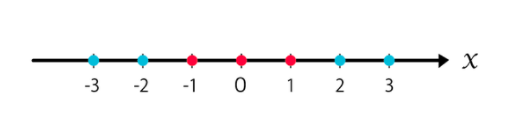

しかし、例えば以下のように変換してみると直線でも分けられそうです。
$x^2=2.5$ 
 あたりに線を引くことになります。
    
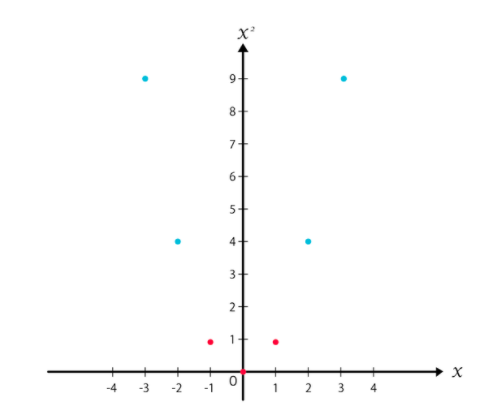

これは
$x^2$
を計算し、それを縦軸にプロットしたグラフです。1次元だったデータを 
$\phi(x)=x^2$
 の関数により高次元（2次元）へと移動しました。


こういったことをSVMはカーネルトリックにより行います。

# 5.他のカーネル関数の実装

## 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。


「線形カーネルの式」

$$
k(x_i, x_j) = x_{i}^{T} x_j
$$

「多項式カーネルの式」

$$
k(x_i, x_j) = ({\gamma}x_{i}^{T} x_j + \theta_0)^{d}
$$

$\gamma$, $\theta_0$, $d$ はハイパーパラメータです。


線形カーネルは$\gamma = 1$, $\theta_0 = 0$, $d = 1$の場合の多項式カーネルと等しいと言えます。

In [998]:
svm2 = ScratchSVMClassifier(num_iter =1000, lr = 0.001, kernel ='poly', degree =2)

In [999]:
svm2.fit(X_train_std, y_train)
Y_pred = svm2.predict(X_valid_std)
Y_pred = Y_pred.T

In [1000]:
print('スクラッチによる推定結果')
print('accuracy = {}'.format(accuracy_score(y_valid, Y_pred)))
print('precision = {}'.format(precision_score(y_valid, Y_pred)))
print('recall = {}'.format(recall_score(y_valid, Y_pred)))
print('f1 score = {}'.format(f1_score(y_valid, Y_pred)))

スクラッチによる推定結果
accuracy = 1.0
precision = 1.0
recall = 1.0
f1 score = 1.0


Number of Support_vactor: 9


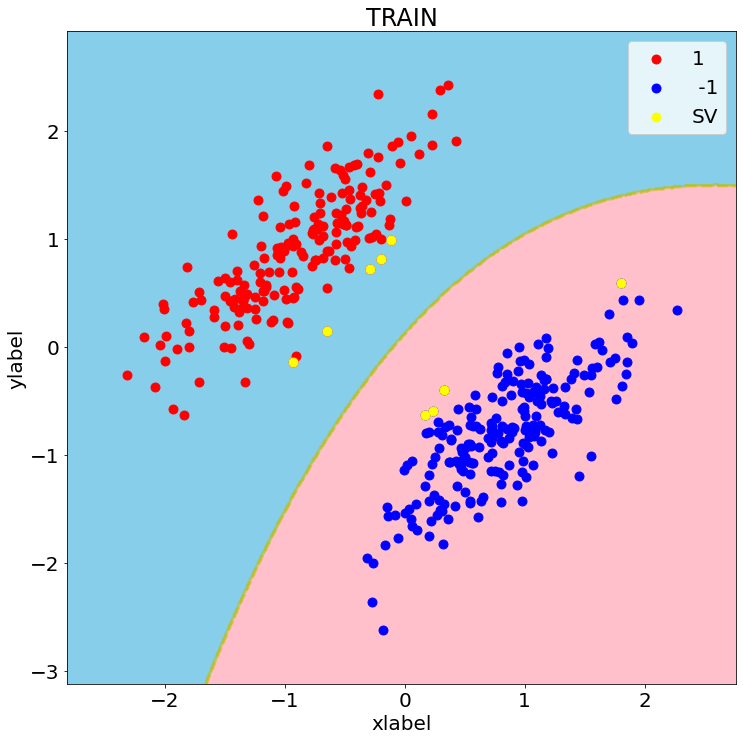

In [1001]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',svm2.n_support_vectors)
decision_region(X_train_std,y_train,svm2,title='TRAIN',target_names=['1', ' -1']);
#plt.scatter(X_valid_std[:,0],X_valid_std[:,1],s=80,label='valid');